# Harshita Mahesh Hiremath - Homework 2

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [37]:
def load_data(file_path):
    data = np.genfromtxt(file_path, delimiter=',')

    # Separate the data into x and y
    x = data[:, 0]
    y = data[:, 1]

    # Plot the data
    plt.scatter(x, y,alpha = 0.5)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Data Distribution')
    plt.show()
    
    return x,y

In [38]:
def normal_eq(x,y):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

    # Add a column of ones to x_train for the bias term (w0)
    X_train = np.column_stack((np.ones(len(x_train)), x_train))
    X_test = np.column_stack((np.ones(len(x_test)), x_test))

    # Calculate the coefficients using the normal equation
    theta_normal = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
    print(f'Coefficients calculated from Normal Equation:{theta_normal}')
    
    return X_train,X_test,x_train,x_test,y_train,y_test

In [39]:
def batch_mode_GD(learning_rate,X_train,X_test,y_train,x_test,y_test):
    
    # Set number of iterations and initalise mse scores for test and train data
    iterations = 1000
    mse_train_batch = []
    mse_test_batch = []
    
    # Initialize coefficients
    coefficients_batch = np.zeros(X_train.shape[1])

    # Gradient Descent
    for i in range(iterations):
        # Calculate the predicted values
        y_pred = X_train.dot(coefficients_batch)

        # Calculate the error
        error = y_pred - y_train

        # Calculate the gradient
        gradient = X_train.T.dot(error)

        # Update coefficients
        coefficients_batch -= learning_rate * gradient

        # Calculate and store the cost (MSE)
        mse = np.mean(error**2)
        mse_train_batch.append(mse)
        mse_test_batch.append(np.mean((X_test.dot(coefficients_batch)-y_test)**2))
        
        if mse_train_batch[-1] < learning_rate:
            break
        
    # Plot MSE vs. iteration for training and testing data for batch modes
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(len(mse_train_batch)), mse_train_batch, label='MSE (Training)')
    plt.plot(range(len(mse_test_batch)), mse_test_batch, label='MSE (Testing)')
    plt.xlabel('Iteration')
    plt.ylabel('MSE')
    plt.title('Batch Gradient Descent')
    plt.legend()
    plt.show()
    
    print("Final coefficients (Batch GD):", coefficients_batch)
    print("Batch GD Converged in {} iterations".format(len(mse_train_batch)))

In [40]:
def stochastic_mode_GD(learning_rate,X_train,X_test,x_train,y_train,x_test,y_test):
    
    # Set number of iterations and initalise mse scores for test and train data
    iterations = 1000
    mse_train_stochastic = []
    mse_test_stochastic = []
    
    # Initialize coefficients
    coefficients_stochastic = np.zeros(X_train.shape[1])

    # Stochastic Gradient Descent
    for i in range(iterations):
        for j in range(len(x_train)):
            # Calculate the predicted value for a single data point
            y_pred = X_train[j].dot(coefficients_stochastic)

            # Calculate the error for the single data point
            error = y_pred - y_train[j]

            # Update coefficients for the single data point
            gradient = X_train[j] * error
            coefficients_stochastic -= learning_rate * gradient

            # Calculate and store the cost (MSE) periodically
            if j % 10 == 0:
                mse = np.mean((X_train.dot(coefficients_stochastic) - y_train)**2)
                mse_train_stochastic.append(mse)
                mse_test_stochastic.append(np.mean((X_test.dot(coefficients_stochastic) - y_test)**2))
    
        if mse_train_stochastic[-1] < learning_rate:
            break

    # Plot MSE vs. iteration for stochastic mode
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 2)
    plt.plot(range(len(mse_train_stochastic)), mse_train_stochastic, label='MSE (Training)')
    plt.plot(range(len(mse_test_stochastic)), mse_test_stochastic, label='MSE (Testing)')
    plt.xlabel('Iteration')
    plt.ylabel('MSE')
    plt.title('Stochastic Gradient Descent')
    plt.legend()
    plt.show()
    
    print("Final coefficients (Stochastic GD):", coefficients_stochastic)
    print("Stochastic GD Converged in {} iterations".format(len(mse_train_stochastic)))

In [41]:
def find_the_best_learning_rate(X_train,X_test,x_train,x_test,y_train,y_test):

    # Define the number of iterations for gradient descent
    iterations = 1000

    # Initialize arrays to store MSE values for different modes
    mse_stochastic_train = []
    mse_stochastic_test = []

    # Initialize learning rates for experimentation
    learning_rates = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]

    # Loop through learning rates
    for learning_rate in learning_rates:
        # Initialize coefficients for stochastic mode
        coefficients_stochastic = np.zeros(X_train.shape[1])

        # Initialize arrays to store cost (MSE) values for gradient descent
        cost_history_stochastic = []

        # Gradient Descent (Stochastic Mode)
        for i in range(iterations):
            for j in range(len(x_train)):
                y_pred_stochastic = X_train[j].dot(coefficients_stochastic)
                error_stochastic = y_pred_stochastic - y_train[j]
                gradient_stochastic = X_train[j] * error_stochastic
                coefficients_stochastic -= learning_rate * gradient_stochastic
                if j % 10 == 0:  # Calculate cost periodically
                    cost_stochastic = np.mean((X_train.dot(coefficients_stochastic) - y_train)**2)
                    cost_history_stochastic.append(cost_stochastic)

        # Calculate MSE for each mode on the training set
        mse_stochastic_train.append(np.mean((X_train.dot(coefficients_stochastic) - y_train)**2))

        # Calculate MSE for each mode on the testing set
        X_test = np.column_stack((np.ones(len(x_test)), x_test))
        mse_stochastic_test.append(np.mean((X_test.dot(coefficients_stochastic) - y_test)**2))

    # Plot MSE vs. Learning Rate
    plt.plot(learning_rates, mse_stochastic_test, label='Stochastic Mode - Testing')
    plt.xlabel('Learning Rate')
    plt.ylabel('MSE (Testing Set)')
    plt.title('MSE vs. Learning Rate')
    plt.show()

    # Determine the best learning rate
    best_learning_rate = learning_rates[np.argmin(mse_stochastic_test)]
    print(f'Best Learning Rate: {best_learning_rate}')

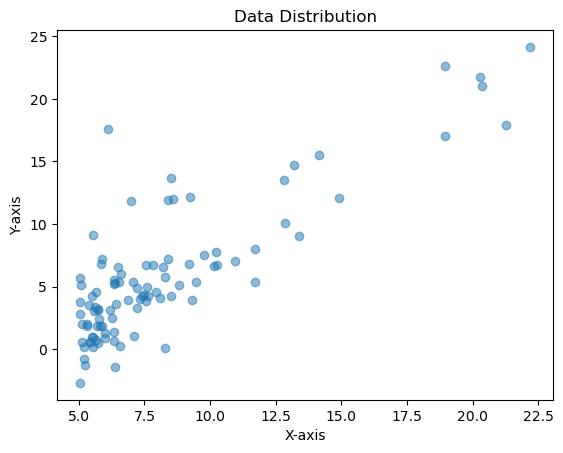

Coefficients calculated from Normal Equation:[-4.7323976   1.28752876]


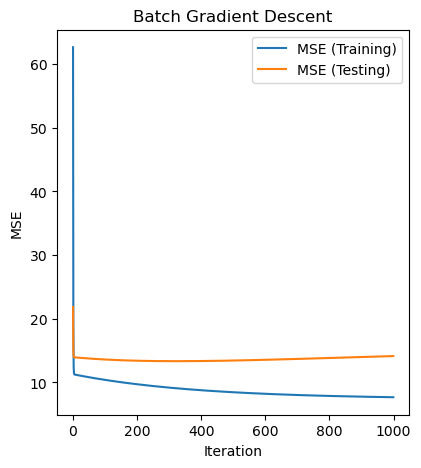

Final coefficients (Batch GD): [-3.40202952  1.15134872]
Batch GD Converged in 1000 iterations


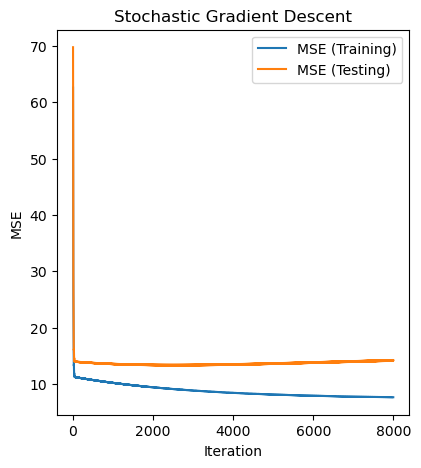

Final coefficients (Stochastic GD): [-3.43477678  1.15596582]
Stochastic GD Converged in 8000 iterations


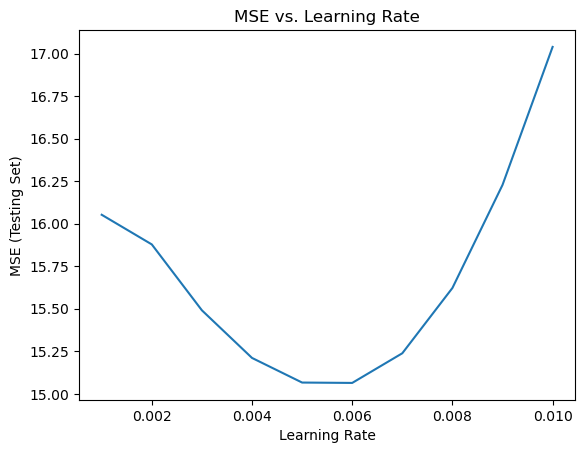

Best Learning Rate: 0.006


In [42]:
if __name__ == "__main__":
    
    file_path = 'data2.txt'
    
    x,y = load_data(file_path)
    
    X_train,X_test,x_train,x_test,y_train,y_test = normal_eq(x,y)
    
    batch_mode_GD(0.0001,X_train,X_test,y_train,x_test,y_test)
    
    stochastic_mode_GD(0.0001,X_train,X_test,x_train,y_train,x_test,y_test)
    
    find_the_best_learning_rate(X_train,X_test,x_train,x_test,y_train,y_test)

Gradient Descent in Batch Mode typically offers a smoother and faster convergence compared to the more erratic behavior of Gradient Descent in Stochastic Mode. 

However, Gradient Descent in Batch Mode is feasible only for relatively small datasets due to the impracticality of storing and processing larger ones.

Regarding accuracy, both BGD and SGD can yield accurate results. The choice between them depends on several factors, including dataset size and learning rate, which significantly influence their performance.